In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [26]:
df = pd.read_csv('avocado.csv')

In [27]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [28]:
#remove unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
#extract month from date column and assign it to new variable
df['Month']  = [int(x[5:7]) for x in df['Date']]

In [30]:
#extract month from day column and assign it to new variable
df['Day'] = [int(x[8:]) for x in df['Date']]

In [31]:
#remove Date column
df.drop('Date', axis=1, inplace=True)

In [32]:
df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,11,22
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,11,15
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,11,8
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,11,1
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,10,25


### Questions to ask

- In which month total no of avocado with PLU 4046 has more sales ? Do the same for other types.
- Different regions where avocados observed ?
- Different types of avocados?
- AveragePrice of different types of avocados.
- Year wise distribution of AveragePrice.

In [33]:
def sales_per_month(PLU):
    return df[PLU].groupby(df['Month']).count()


tick = [x for x in range(1, 13)]

Text(0.5, 1.0, 'sales of PLU 4770')

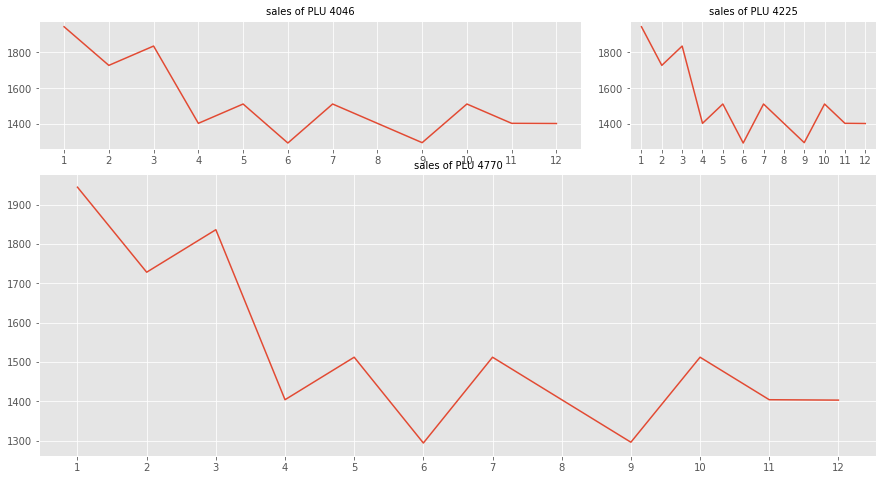

In [34]:
plt.figure(figsize=(15,8))
a1 = plt.subplot2grid((3,3), (0,0), colspan=2)
a2 = plt.subplot2grid((3,3), (0,2), colspan=2, sharex=a1)
a3 = plt.subplot2grid((3,3), (1,0), colspan=4, rowspan=3, sharex=a1)
a1.plot(sales_per_month('4046'))
a1.set_title('sales of PLU 4046', fontsize=10)
a1.set_xticks(tick)
a2.plot(sales_per_month('4225'))
a2.set_title('sales of PLU 4225', fontsize=10)
a3.plot(sales_per_month('4770'))
a3.set_title('sales of PLU 4770', fontsize=10)

- At each passing month sales tends to go lower.

Text(0.5, 1.0, 'First 20 Unique regions')

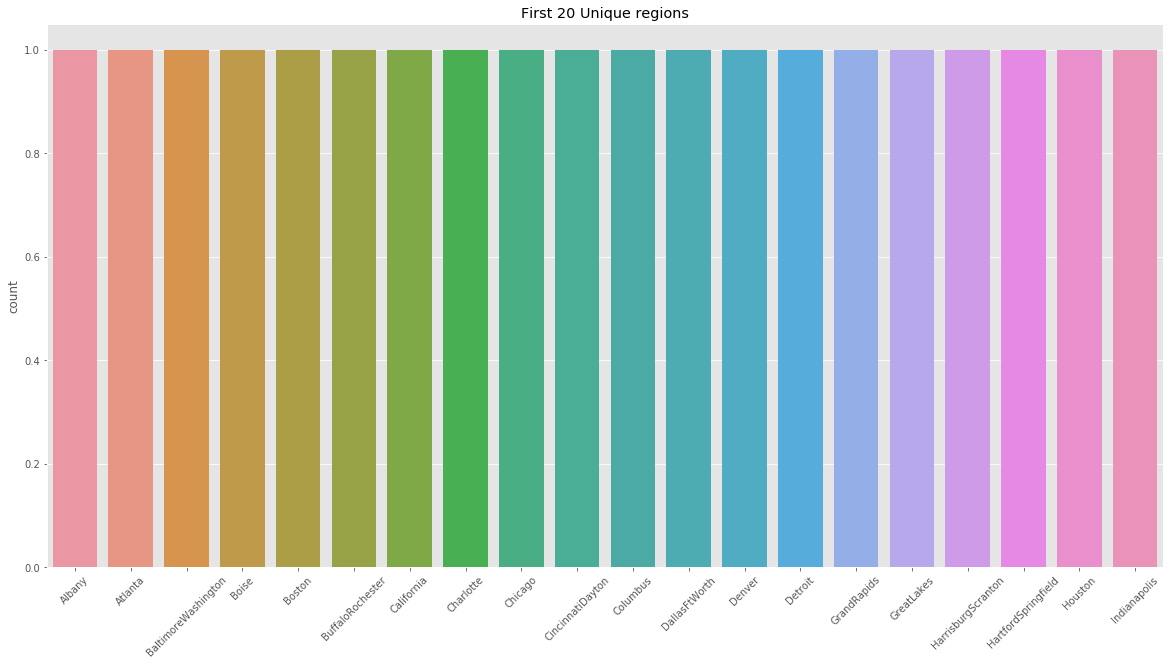

In [35]:
plt.figure(figsize=(20, 10))
sns.countplot(df['region'].unique()[:20])
plt.xticks(rotation=45)
plt.title("First 20 Unique regions")

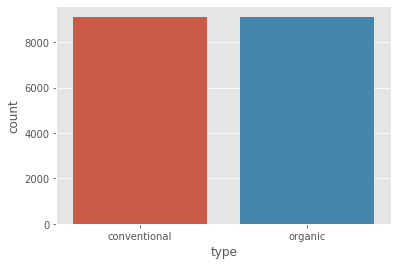

In [36]:
sns.countplot(df['type'])

- Both Conventional and organic types are equal in count

<BarContainer object of 54 artists>

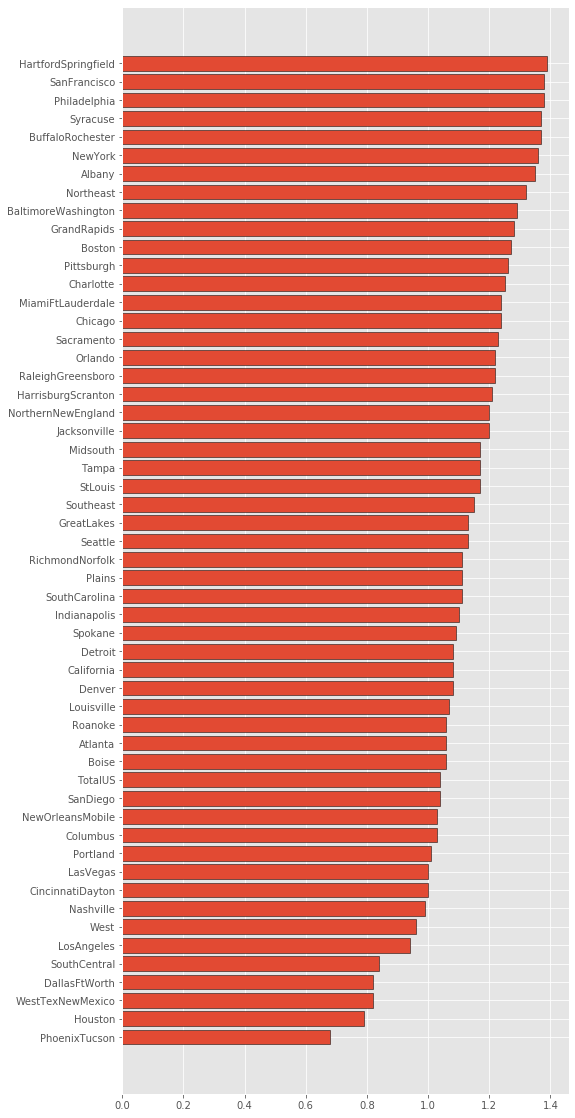

In [37]:
df_conventional_type = df[df['type'] == 'conventional'].groupby(df['region']).median().sort_values('AveragePrice')


plt.figure(figsize=(8, 20))
plt.barh(df_conventional_type['AveragePrice'].index, df_conventional_type['AveragePrice'], edgecolor='black')

<BarContainer object of 54 artists>

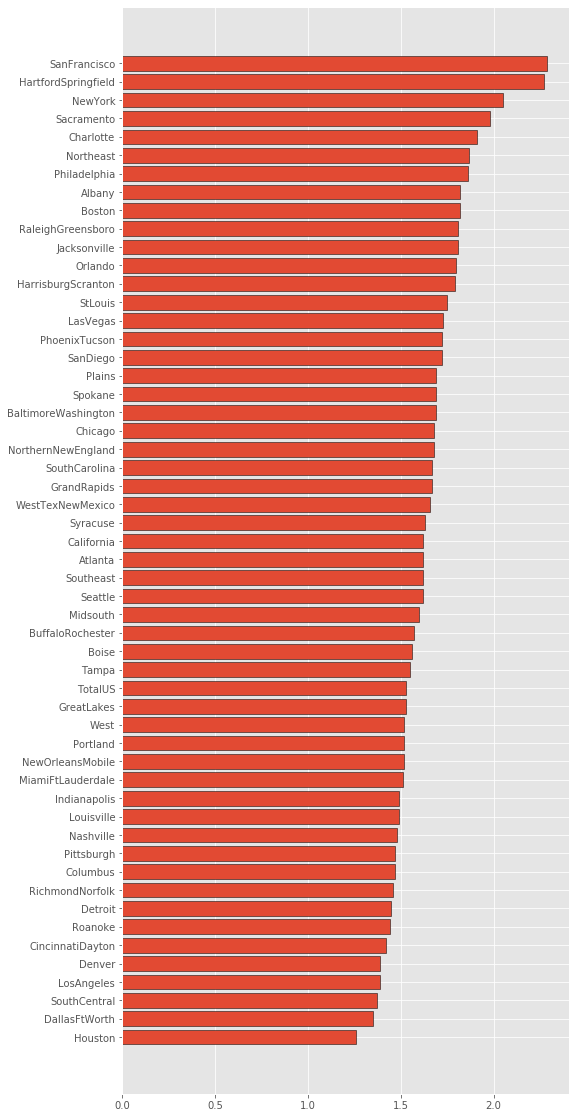

In [38]:
df_organic_type = df[df['type'] == 'organic'].groupby(df['region']).median().sort_values('AveragePrice')


plt.figure(figsize=(8, 20))
plt.barh(df_organic_type['AveragePrice'].index, df_organic_type['AveragePrice'], edgecolor='black')

([<matplotlib.axis.XTick at 0x1a29f2d110>,
 <a list of 4 Text xticklabel objects>)

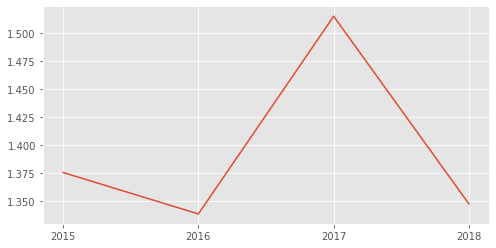

In [39]:
data = df['AveragePrice'].groupby(df['year']).mean()
plt.figure(figsize=(8,4))
plt.plot(data)
plt.xticks(df['year'].unique())